In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import ensemble
%matplotlib inline

### Загрузим наши данные

In [2]:
flats = pd.read_csv('flats_data.csv')

In [3]:
type(flats)

pandas.core.frame.DataFrame

In [4]:
flats[:5]

,y,agency,commissionPercent,metroDistance,metroStation,metroLine,apartmentType,apartmentSquare,apartmentFloor,buildingFloor,absoluteTime,relativeTime,latitude,longitude,postalCode,area,vip
0,1,No,0,2400,Парк Культуры,Автозаводская линия,Студия,24.7,6,10,1569057420,1 неделю назад,56.230577,43.826602,603142,Автозаводский район,No
1,3,No,0,550,Стрелка,None,2-к квартира,44.0,4,5,1569061740,1 неделю назад,56.291479,44.047453,603122,Советский район,No
2,2,Yes,0,3600,Двигатель Революции,Автозаводская линия,1-к квартира,36.0,5,9,1569057420,1 неделю назад,56.265607,43.976935,603009,Приокский район,No
3,2,No,0,500,Пролетарская,Автозаводская линия,1-к квартира,30.0,2,5,1569056100,1 неделю назад,56.263027,43.909049,603064,Ленинский район,No
4,4,Yes,70,5300,Горьковская,Автозаводская линия,3-к квартира,90.0,4,9,1569062880,1 неделю назад,56.303536,44.079037,603163,Нижегородский район,No


In [14]:
print(flats[:5])

   y agency  commissionPercent  metroDistance         metroStation  \
0  1     No                  0           2400        Парк Культуры   
1  3     No                  0            550              Стрелка   
2  2    Yes                  0           3600  Двигатель Революции   
3  2     No                  0            500         Пролетарская   
4  4    Yes                 70           5300          Горьковская   

             metroLine apartmentType  apartmentSquare  apartmentFloor  \
0  Автозаводская линия        Студия             24.7               6   
1                 None  2-к квартира             44.0               4   
2  Автозаводская линия  1-к квартира             36.0               5   
3  Автозаводская линия  1-к квартира             30.0               2   
4  Автозаводская линия  3-к квартира             90.0               4   

   buildingFloor  absoluteTime    relativeTime   latitude  longitude  \
0             10    1569057420  1 неделю назад  56.230577  43.826602

### Величина выборки

In [41]:
len(flats)

1930

### Количество признаков

In [42]:
len(flats.columns)-1

16

In [13]:
flats.head()

,y,agency,commissionPercent,metroDistance,metroStation,metroLine,apartmentType,apartmentSquare,apartmentFloor,buildingFloor,absoluteTime,relativeTime,latitude,longitude,postalCode,area,vip
0,1,No,0,2400,Парк Культуры,Автозаводская линия,Студия,24.7,6,10,1569057420,1 неделю назад,56.230577,43.826602,603142,Автозаводский район,No
1,3,No,0,550,Стрелка,None,2-к квартира,44.0,4,5,1569061740,1 неделю назад,56.291479,44.047453,603122,Советский район,No
2,2,Yes,0,3600,Двигатель Революции,Автозаводская линия,1-к квартира,36.0,5,9,1569057420,1 неделю назад,56.265607,43.976935,603009,Приокский район,No
3,2,No,0,500,Пролетарская,Автозаводская линия,1-к квартира,30.0,2,5,1569056100,1 неделю назад,56.263027,43.909049,603064,Ленинский район,No
4,4,Yes,70,5300,Горьковская,Автозаводская линия,3-к квартира,90.0,4,9,1569062880,1 неделю назад,56.303536,44.079037,603163,Нижегородский район,No


In [12]:
flats[:5]

,y,agency,commissionPercent,metroDistance,metroStation,metroLine,apartmentType,apartmentSquare,apartmentFloor,buildingFloor,absoluteTime,relativeTime,latitude,longitude,postalCode,area,vip
0,1,No,0,2400,Парк Культуры,Автозаводская линия,Студия,24.7,6,10,1569057420,1 неделю назад,56.230577,43.826602,603142,Автозаводский район,No
1,3,No,0,550,Стрелка,None,2-к квартира,44.0,4,5,1569061740,1 неделю назад,56.291479,44.047453,603122,Советский район,No
2,2,Yes,0,3600,Двигатель Революции,Автозаводская линия,1-к квартира,36.0,5,9,1569057420,1 неделю назад,56.265607,43.976935,603009,Приокский район,No
3,2,No,0,500,Пролетарская,Автозаводская линия,1-к квартира,30.0,2,5,1569056100,1 неделю назад,56.263027,43.909049,603064,Ленинский район,No
4,4,Yes,70,5300,Горьковская,Автозаводская линия,3-к квартира,90.0,4,9,1569062880,1 неделю назад,56.303536,44.079037,603163,Нижегородский район,No


In [11]:
flats.tail()

,y,agency,commissionPercent,metroDistance,metroStation,metroLine,apartmentType,apartmentSquare,apartmentFloor,buildingFloor,absoluteTime,relativeTime,latitude,longitude,postalCode,area,vip
1925,3,Yes,70,1800,Бурнаковская,Сормовская линия,3-к квартира,70.0,4,9,1567506000,3 недели назад,56.331912,43.945242,603070,Канавинский район,No
1926,2,Yes,50,800,Буревестник,Сормовская линия,2-к квартира,40.0,2,5,1567503420,3 недели назад,56.328274,43.883816,603014,Сормовский район,No
1927,3,Yes,50,1700,Буревестник,Сормовская линия,3-к квартира,80.0,3,10,1567493100,3 недели назад,56.341528,43.916559,603074,Московский район,No
1928,1,No,0,8600,Автозаводская,Автозаводская линия,1-к квартира,32.0,3,3,1567498080,3 недели назад,56.216224,44.019623,607686,Кстовский район,No
1929,4,Yes,70,5400,Горьковская,Автозаводская линия,1-к квартира,44.0,9,22,1567606260,3 недели назад,56.307472,44.081166,603093,Нижегородский район,No


# Описание датасета
* Данные были получены с сайта avito.ru c фильтром г.Нижний Новгород и тип жилья "сдается".  
* Так же после были дополнены данными с геокодера yandex'а и openstreetmap.
* Данные уже предобработаны поэтому NaN значения заменены на стринговые 'None'. 


In [20]:
len(flats[pd.isnull(flats).any(axis=1)])

0

## Признаки
* agency - говорит о том, сдается квартира через агенство или нет
    * 'Yes', 'No'
* commissionPercent - процент от ежемесячной суммы, который нужно будет заплатить при заключении договора
    * int
* metroDistance - количество метров до ближайшей станции метро
    * int
* metroStation - название ближайшей станции метро
    * 'Парк Культуры', 'Стрелка', 'Двигатель Революции', 'Пролетарская',
       'Горьковская', 'Автозаводская', 'Буревестник', 'Московская',
       'Бурнаковская', 'Ленинская', 'Кировская', 'Заречная',
       'Комсомольская', 'Чкаловская', 'Канавинская', 'Беревестник'
* metroLine - название линии метро на которой расположена квартира или 'None' значение 
    * 'Автозаводская линия', 'None', 'Сормовская линия'
* apartmentType - тип квартиры
    * 'Студия', '2-к квартира', '1-к квартира', '3-к квартира',
       '4-к квартира', '5-к квартира'
* apartmentSquare - площадь квартиры
    * float
* apartmentFloor - этаж на котором расположена квартира
    * int
* buildingFloor - общее количество этажей в здании
    * int
* absoluteTime - абсолютное время в милисекундах
    * int
* relativeTime - относительное время с момента парсинга данных
    * текствая строка
* latitude - широта
    * float
* longitude - долгота
    * float
* postalCode - почтовый индекс
    * int
* area - район города или близлижайшей оласти
    * 'Автозаводский район', 'Советский район', 'Приокский район',
       'Ленинский район', 'Нижегородский район', 'Сормовский район',
       'Кстовский район', 'Канавинский район', 'Московский район',
       'Богородский район'
* vip - булевое поле обозначающее имеет ли это объявление VIP статус на avito.ru или нет
    * 'Yes', 'No'

In [135]:
flats.relativeTime.unique()

array(['1 неделю назад', '2 недели назад', '1 день назад', '3 дня назад',
       '5 дней назад', '6 дней назад', '19 часов назад', '20 часов назад',
       '21 час назад', '22 часа назад', '5 часов назад', '23 часа назад',
       '3 недели назад', 'более месяца назад', '16 часов назад',
       '36 минут назад', '4 часа назад', '13 часов назад',
       '3 минуты назад', '1 минуту назад', '20 минут назад',
       '40 минут назад', '47 минут назад', '48 минут назад',
       '1 час назад', '2 часа назад', '3 часа назад', '24 минуты назад',
       '6 часов назад', '14 часов назад', '15 часов назад',
       '17 часов назад', '18 часов назад', '2 дня назад', '4 дня назад'],
      dtype=object)

## Y столбец
* 1: цена <= 10 000
* 2:  10 000 < цена <= 15 000
* 3: 15 000 < цена <= 20 000
* 4: цена > 20 000

### Задача класификации с 4мя классами. Определить к какому ценовому диапазону принадлежит квартира.

In [138]:
print(flats.shape)
print(flats.columns)

(1930, 17)
Index(['y', 'agency', 'commissionPercent', 'metroDistance', 'metroStation',
       'metroLine', 'apartmentType', 'apartmentSquare', 'apartmentFloor',
       'buildingFloor', 'absoluteTime', 'relativeTime', 'latitude',
       'longitude', 'postalCode', 'area', 'vip'],
      dtype='object')


In [139]:
flats.index

RangeIndex(start=0, stop=1930, step=1)

#### Рассмотрим некоторые конкретные значения

In [140]:
flats['metroStation'][17]

'Пролетарская'

In [142]:
flats['latitude'].dtype.name

'float64'

In [143]:
type(flats['metroStation'][3])

str

In [144]:
type(flats['latitude'])

pandas.core.series.Series

In [145]:
flats[['metroStation', 'latitude']].head()

,metroStation,latitude
0,Парк Культуры,56.230577
1,Стрелка,56.291479
2,Двигатель Революции,56.265607
3,Пролетарская,56.263027
4,Горьковская,56.303536


In [17]:
flats.describe()

,y,commissionPercent,metroDistance,apartmentSquare,apartmentFloor,buildingFloor,absoluteTime,latitude,longitude,postalCode
count,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1.930000e+03,1930.000000,1930.000000,1930.000000
mean,2.673057,38.484456,2581.673575,54.423161,5.362176,9.849741,1.568654e+09,56.296497,43.953862,603157.826425
std,0.999403,30.447722,2268.761957,115.298280,3.774752,5.039009,7.448897e+05,0.038619,0.077689,561.658343
min,1.000000,0.000000,100.000000,15.000000,1.000000,1.000000,1.567165e+09,56.178914,43.741612,603000.000000
25%,2.000000,0.000000,1000.000000,35.000000,3.000000,5.000000,1.568040e+09,56.276764,43.875823,603028.000000
50%,3.000000,50.000000,1900.000000,45.000000,5.000000,9.000000,1.568727e+09,56.305699,43.958241,603087.000000
75%,4.000000,70.000000,3900.000000,62.000000,7.000000,10.000000,1.569320e+09,56.320742,44.018832,603138.000000
max,4.000000,100.000000,43700.000000,5000.000000,24.000000,31.000000,1.569704e+09,56.391840,44.091596,607686.000000


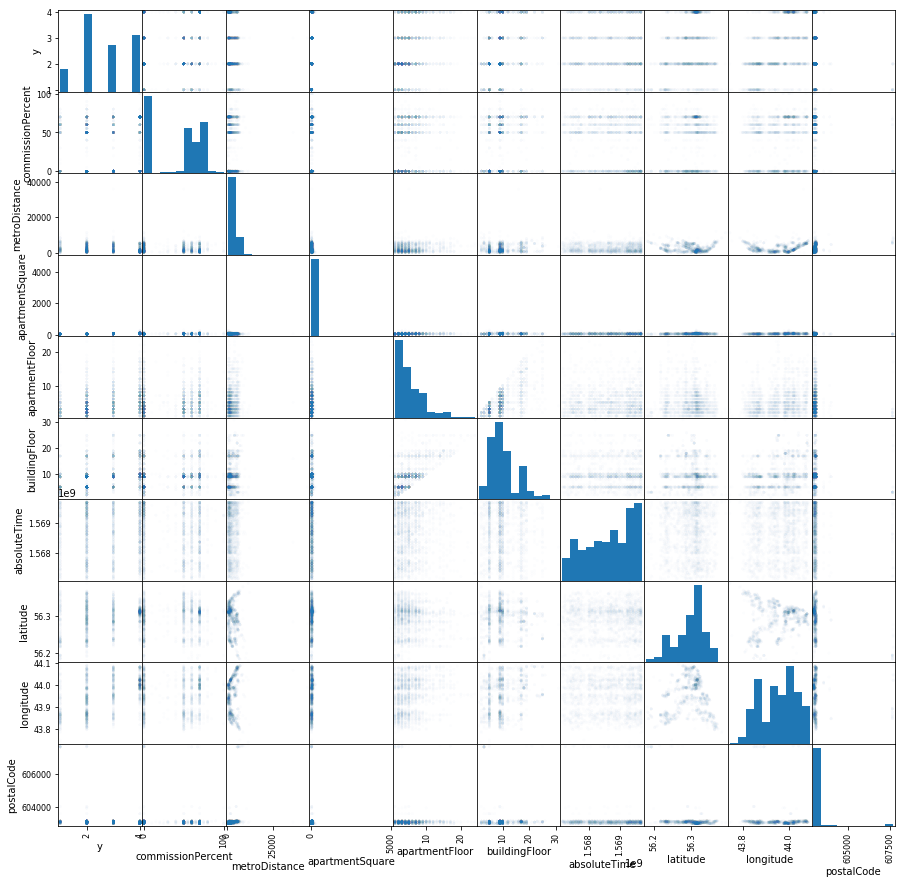

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(flats, alpha = .01, figsize = (15, 15))
pass

### Два варианта отрисовки матрицы кореляции

In [6]:
flats.corr().style.background_gradient(cmap='coolwarm')

,y,commissionPercent,metroDistance,apartmentSquare,apartmentFloor,buildingFloor,absoluteTime,latitude,longitude,postalCode
y,1,0.120423,-0.125511,0.160964,0.282876,0.301735,0.0221162,0.246067,0.519422,-0.192565
commissionPercent,0.120423,1,-0.107973,0.00454349,0.0393512,0.0869967,-0.117095,0.104757,0.0738822,-0.0827987
metroDistance,-0.125511,-0.107973,1,0.00507201,0.0598717,0.116598,-0.00700111,-0.128837,0.141424,0.260436
apartmentSquare,0.160964,0.00454349,0.00507201,1,0.0616428,0.0528632,0.0325272,0.0205294,0.0802199,-0.0249981
apartmentFloor,0.282876,0.0393512,0.0598717,0.0616428,1,0.66942,0.0315536,-0.0483031,0.200991,-0.0574609
buildingFloor,0.301735,0.0869967,0.116598,0.0528632,0.66942,1,-0.0127468,-0.00698366,0.249876,-0.0925909
absoluteTime,0.0221162,-0.117095,-0.00700111,0.0325272,0.0315536,-0.0127468,1,-0.000886502,0.0167076,-0.0179339
latitude,0.246067,0.104757,-0.128837,0.0205294,-0.0483031,-0.00698366,-0.000886502,1,0.0949862,-0.317704
longitude,0.519422,0.0738822,0.141424,0.0802199,0.200991,0.249876,0.0167076,0.0949862,1,-0.054678
postalCode,-0.192565,-0.0827987,0.260436,-0.0249981,-0.0574609,-0.0925909,-0.0179339,-0.317704,-0.054678,1


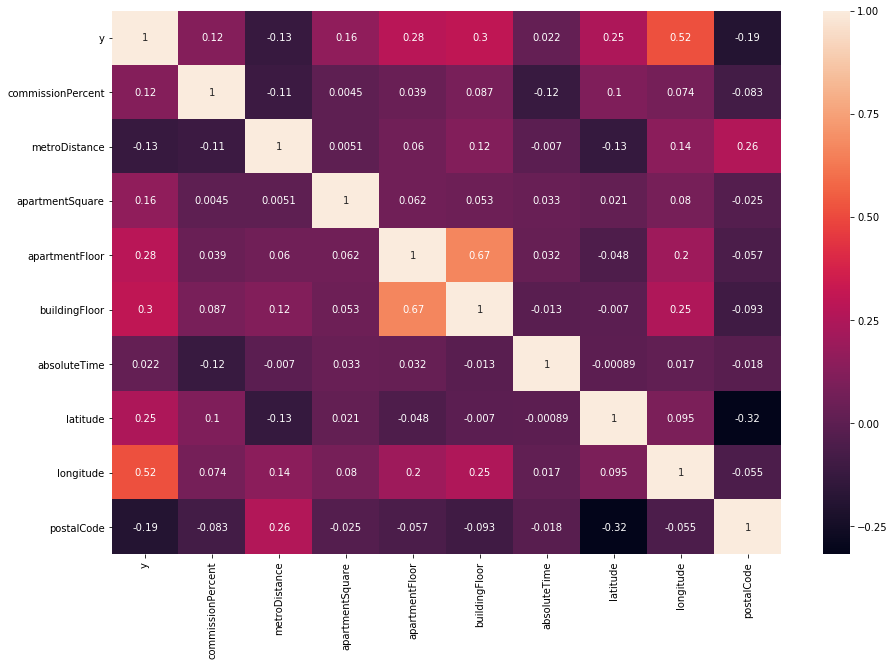

In [139]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data=flats.corr(), annot=True, ax=ax)

### Посмотрим на то, что квартира на 10 этаже не может быть в 5ти этажно доме)

Text(0.5, 1.0, 'apartmentFloor vs buildingFloor')

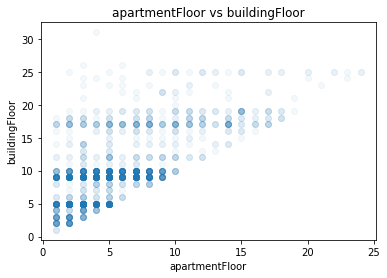

In [155]:
plt.plot(flats['apartmentFloor'], flats['buildingFloor'], 'o', alpha = 0.05)
plt.xlabel('apartmentFloor')
plt.ylabel('buildingFloor')
plt.title('apartmentFloor vs buildingFloor')

In [21]:
(flats['y'] == 1)[:5]

0     True
1    False
2    False
3    False
4    False
Name: y, dtype: bool

### Отобразим ценовые классы в сосоответсвие с координатами квартиры

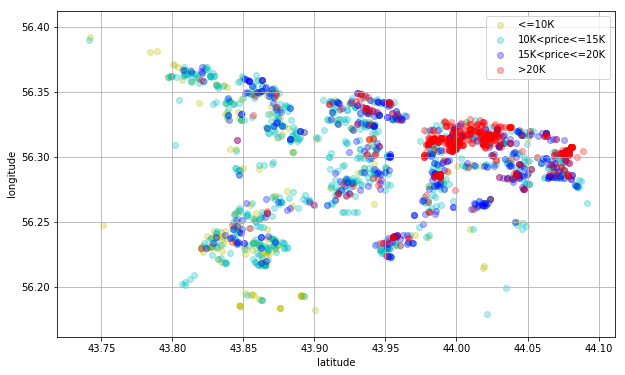

In [11]:
plt.figure(figsize = (10, 6))

plt.scatter(flats[flats['y'] == 1]['longitude'],
            flats[flats['y'] == 1]['latitude'],
            alpha = 0.3,
            label = '<=10К',
            color = 'y')

plt.scatter(flats[flats['y'] == 2]['longitude'],
            flats[flats['y'] == 2]['latitude'],
            alpha = 0.3,
            label = '10K<price<=15K',
            color = 'c')

plt.scatter(flats[flats['y'] == 3]['longitude'],
            flats[flats['y'] == 3]['latitude'],
            alpha = 0.3,
            label = '15K<price<=20K',
            color = 'b')

plt.scatter(flats[flats['y'] == 4]['longitude'],
            flats[flats['y'] == 4]['latitude'],
            alpha = 0.3,
            label = '>20K',
            color = 'r')

plt.xlabel('latitude')
plt.ylabel('longitude')
plt.legend()
plt.grid()

### Раскрасим уветами квартиры в разных районах

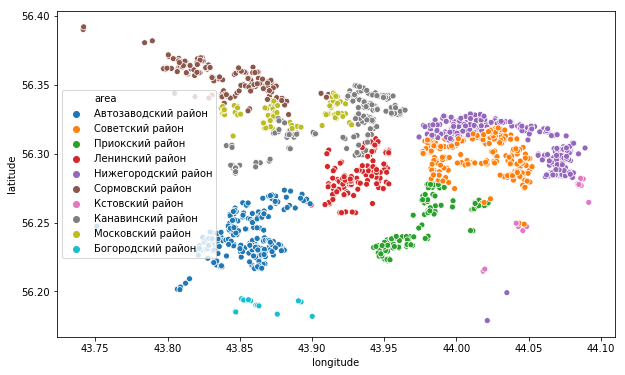

In [176]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(flats.longitude,flats.latitude,hue=flats.area)
plt.ioff()

In [140]:
import folium
from folium.plugins import HeatMap
m=folium.Map([56.301365, 43.984700],zoom_start=11)
HeatMap(flats[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

## Добавил картинку, потому что не отображается в браузере
### (подсвечены места, где находятся квартиры)

![title](img.PNG)

In [22]:
flats.describe(include = ['object'])

,agency,metroStation,metroLine,apartmentType,relativeTime,area,vip
count,1930,1930,1930,1930,1930,1930,1930
unique,2,16,3,6,35,10,2
top,Yes,Горьковская,Автозаводская линия,1-к квартира,1 неделю назад,Советский район,No
freq,1219,879,1458,831,456,427,1905


In [23]:
flats.describe(include = 'all')

,y,agency,commissionPercent,metroDistance,metroStation,metroLine,apartmentType,apartmentSquare,apartmentFloor,buildingFloor,absoluteTime,relativeTime,latitude,longitude,postalCode,area,vip
count,1930.000000,1930,1930.000000,1930.000000,1930,1930,1930,1930.000000,1930.000000,1930.000000,1.930000e+03,1930,1930.000000,1930.000000,1930.000000,1930,1930
unique,NaN,2,NaN,NaN,16,3,6,NaN,NaN,NaN,NaN,35,NaN,NaN,NaN,10,2
top,NaN,Yes,NaN,NaN,Горьковская,Автозаводская линия,1-к квартира,NaN,NaN,NaN,NaN,1 неделю назад,NaN,NaN,NaN,Советский район,No
freq,NaN,1219,NaN,NaN,879,1458,831,NaN,NaN,NaN,NaN,456,NaN,NaN,NaN,427,1905
mean,2.673057,NaN,38.484456,2581.673575,NaN,NaN,NaN,54.423161,5.362176,9.849741,1.568654e+09,NaN,56.296497,43.953862,603157.826425,NaN,NaN
std,0.999403,NaN,30.447722,2268.761957,NaN,NaN,NaN,115.298280,3.774752,5.039009,7.448897e+05,NaN,0.038619,0.077689,561.658343,NaN,NaN
min,1.000000,NaN,0.000000,100.000000,NaN,NaN,NaN,15.000000,1.000000,1.000000,1.567165e+09,NaN,56.178914,43.741612,603000.000000,NaN,NaN
25%,2.000000,NaN,0.000000,1000.000000,NaN,NaN,NaN,35.000000,3.000000,5.000000,1.568040e+09,NaN,56.276764,43.875823,603028.000000,NaN,NaN
50%,3.000000,NaN,50.000000,1900.000000,NaN,NaN,NaN,45.000000,5.000000,9.000000,1.568727e+09,NaN,56.305699,43.958241,603087.000000,NaN,NaN
75%,4.000000,NaN,70.000000,3900.000000,NaN,NaN,NaN,62.000000,7.000000,10.000000,1.569320e+09,NaN,56.320742,44.018832,603138.000000,NaN,NaN


### Среднее значение этажей зданий по районам

In [16]:
for name in flats['area'].unique():
    print(name, int(flats['buildingFloor'][flats['area'] == name].mean()))

Автозаводский район 8
Советский район 10
Приокский район 11
Ленинский район 9
Нижегородский район 10
Сормовский район 8
Кстовский район 17
Канавинский район 9
Московский район 7
Богородский район 3


## Посмотрим на процентное соотношение наших классов для задачи класификации

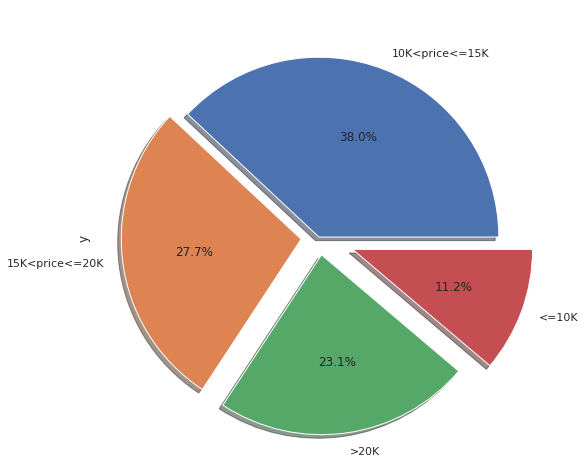

In [33]:
flats['y'].value_counts().plot.pie(explode=[0,0.1,0.1, 0.2],autopct='%1.1f%%',shadow=True, 
                                   labels = ['10K<price<=15K', '15K<price<=20K', '>20K', '<=10K'])
plt.show()

### Для интереса посмотрим на разные распределения с конкретными ценами квартир

In [46]:
dataWithPrice = pd.read_csv('dataProcessing/flats.csv')
dataWithPrice = dataWithPrice.loc[dataWithPrice['price'] < 500000]

<Figure size 720x432 with 0 Axes>

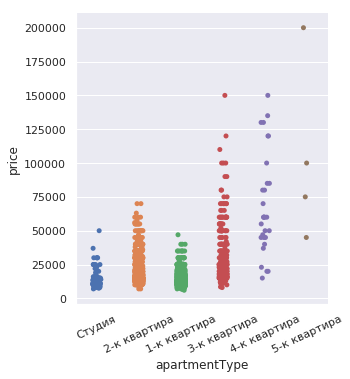

In [53]:
plt.figure(figsize=(10,6))
sns.catplot(x="apartmentType", y="price", data=dataWithPrice);
plt.xticks(rotation=25)
plt.ioff()

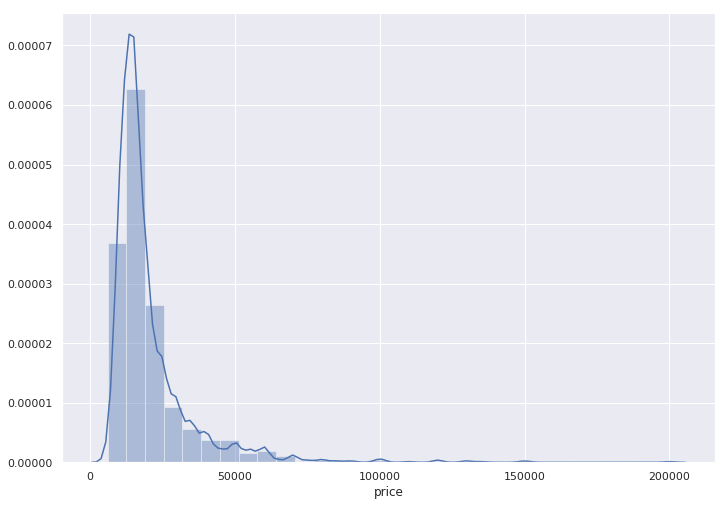

In [55]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(dataWithPrice['price'], bins=30)
plt.show()

In [60]:
dataWithPrice = dataWithPrice.loc[dataWithPrice['price'] < 50000]

### Можем наблюдать как орендатели любят круглые суммы

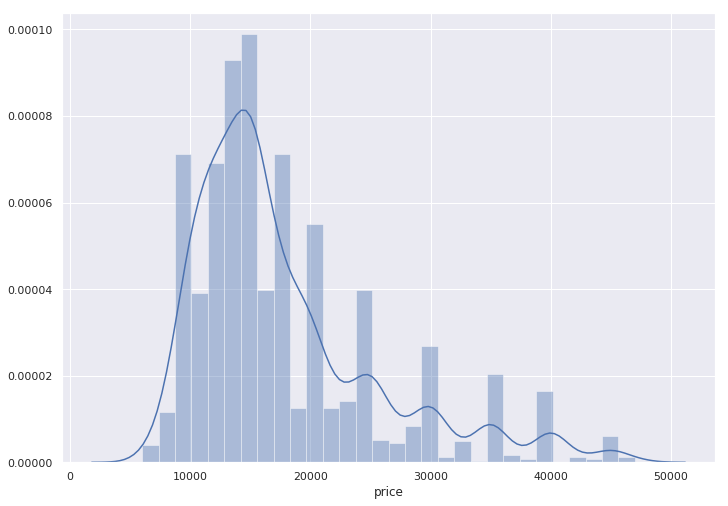

In [61]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(dataWithPrice['price'], bins=30)
plt.show()

## Задача
удалим относительное время публикации объявления и в будущем присмотримся к возможности удалить количество этажей в доме


In [3]:
data = flats.drop('relativeTime', axis = 1)

In [4]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print('categorical_columns: \n' + str(categorical_columns))
print()
print('numerical_columns: \n' + str(numerical_columns))

categorical_columns: 
['agency', 'metroStation', 'metroLine', 'apartmentType', 'area', 'vip']

numerical_columns: 
['y', 'commissionPercent', 'metroDistance', 'apartmentSquare', 'apartmentFloor', 'buildingFloor', 'absoluteTime', 'latitude', 'longitude', 'postalCode']


### Как описывалось ранее данные предобработаны и пропущенных значений нет, но расмотим некоторые характеристики, которые могли бы использовать для заполнения пропусков в данных

In [130]:
data.median(axis = 0)

y                    3.000000e+00
commissionPercent    5.000000e+01
metroDistance        1.900000e+03
apartmentSquare      4.500000e+01
apartmentFloor       5.000000e+00
buildingFloor        9.000000e+00
absoluteTime         1.568727e+09
latitude             5.630570e+01
longitude            4.395824e+01
postalCode           6.030870e+05
dtype: float64

In [131]:
data['area'].describe().top

'Советский район'

### Т.е. количественные признаки мы бы заполняли средним значением, а категориальные самым часто встречающимся.

In [132]:
data.describe(include = [object])

,agency,metroStation,metroLine,apartmentType,area,vip
count,1930,1930,1930,1930,1930,1930
unique,2,16,3,6,10,2
top,Yes,Горьковская,Автозаводская линия,1-к квартира,Советский район,No
freq,1219,879,1458,831,427,1905


### Векторизация

In [5]:
data_describe = data.describe(include = [object])

binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['agency', 'vip'] ['metroStation', 'metroLine', 'apartmentType', 'area']


In [6]:
data.at[data['vip'] == 'No', 'vip'] = 0
data.at[data['vip'] == 'Yes', 'vip'] = 1
data['vip'].describe()

count    1930.000000
mean        0.012953
std         0.113103
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: vip, dtype: float64

In [7]:
data.at[data['agency'] == 'No', 'agency'] = 0
data.at[data['agency'] == 'Yes', 'agency'] = 1
data['agency'].describe()

count    1930.000000
mean        0.631606
std         0.482494
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: agency, dtype: float64

In [8]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['metroStation_Автозаводская', 'metroStation_Беревестник',
       'metroStation_Буревестник', 'metroStation_Бурнаковская',
       'metroStation_Горьковская', 'metroStation_Двигатель Революции',
       'metroStation_Заречная', 'metroStation_Канавинская',
       'metroStation_Кировская', 'metroStation_Комсомольская',
       'metroStation_Ленинская', 'metroStation_Московская',
       'metroStation_Парк Культуры', 'metroStation_Пролетарская',
       'metroStation_Стрелка', 'metroStation_Чкаловская', 'metroLine_None',
       'metroLine_Автозаводская линия', 'metroLine_Сормовская линия',
       'apartmentType_1-к квартира', 'apartmentType_2-к квартира',
       'apartmentType_3-к квартира', 'apartmentType_4-к квартира',
       'apartmentType_5-к квартира', 'apartmentType_Студия',
       'area_Автозаводский район', 'area_Богородский район',
       'area_Канавинский район', 'area_Кстовский район',
       'area_Ленинский район', 'area_Московский район',
       'area_Нижегородский район', '

### Нормализация количественных признаков

In [9]:
data_numerical = data[numerical_columns].drop(('y'), axis = 1)
data_numerical.describe()

,commissionPercent,metroDistance,apartmentSquare,apartmentFloor,buildingFloor,absoluteTime,latitude,longitude,postalCode
count,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1.930000e+03,1930.000000,1930.000000,1930.000000
mean,38.484456,2581.673575,54.423161,5.362176,9.849741,1.568654e+09,56.296497,43.953862,603157.826425
std,30.447722,2268.761957,115.298280,3.774752,5.039009,7.448897e+05,0.038619,0.077689,561.658343
min,0.000000,100.000000,15.000000,1.000000,1.000000,1.567165e+09,56.178914,43.741612,603000.000000
25%,0.000000,1000.000000,35.000000,3.000000,5.000000,1.568040e+09,56.276764,43.875823,603028.000000
50%,50.000000,1900.000000,45.000000,5.000000,9.000000,1.568727e+09,56.305699,43.958241,603087.000000
75%,70.000000,3900.000000,62.000000,7.000000,10.000000,1.569320e+09,56.320742,44.018832,603138.000000
max,100.000000,43700.000000,5000.000000,24.000000,31.000000,1.569704e+09,56.391840,44.091596,607686.000000


In [10]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,commissionPercent,metroDistance,apartmentSquare,apartmentFloor,buildingFloor,absoluteTime,latitude,longitude,postalCode
count,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03
mean,-9.388000e-17,1.104471e-17,1.067655e-16,-3.681569e-17,9.434019e-17,-7.296133e-14,5.157601e-14,-2.924270e-14,-1.020199e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.263952e+00,-1.093845e+00,-3.419232e-01,-1.155619e+00,-1.756246e+00,-1.998873e+00,-3.044659e+00,-2.732032e+00,-2.810008e-01
25%,-1.263952e+00,-6.971527e-01,-1.684601e-01,-6.257832e-01,-9.624394e-01,-8.233234e-01,-5.109563e-01,-1.004500e+00,-2.311484e-01
50%,3.782071e-01,-3.004606e-01,-8.172854e-02,-9.594702e-02,-1.686325e-01,9.865872e-02,2.382708e-01,5.636410e-02,-1.261023e-01
75%,1.035071e+00,5.810775e-01,6.571511e-02,4.338892e-01,2.981917e-02,8.949243e-01,6.277894e-01,8.362767e-01,-3.529980e-02
max,2.020366e+00,1.812368e+01,4.289376e+01,4.937497e+00,4.197305e+00,1.409792e+00,2.468778e+00,1.772877e+00,8.062150e+00


### Соединяем все в одну таблицу

In [11]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns], data['y']), axis = 1)
print(data.shape)

(1930, 47)


In [140]:
data.describe()

,commissionPercent,metroDistance,apartmentSquare,apartmentFloor,buildingFloor,absoluteTime,latitude,longitude,postalCode,metroStation_Автозаводская,...,area_Кстовский район,area_Ленинский район,area_Московский район,area_Нижегородский район,area_Приокский район,area_Советский район,area_Сормовский район,agency,vip,y
count,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1930.000000,...,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000
mean,-9.388000e-17,1.104471e-17,1.067655e-16,-3.681569e-17,9.434019e-17,-7.296133e-14,5.157601e-14,-2.924270e-14,-1.020199e-13,0.040933,...,0.009845,0.072539,0.053368,0.218653,0.073057,0.221244,0.091710,0.631606,0.012953,2.673057
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.198186,...,0.098756,0.259445,0.224824,0.413440,0.260297,0.415192,0.288691,0.482494,0.113103,0.999403
min,-1.263952e+00,-1.093845e+00,-3.419232e-01,-1.155619e+00,-1.756246e+00,-1.998873e+00,-3.044659e+00,-2.732032e+00,-2.810008e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-1.263952e+00,-6.971527e-01,-1.684601e-01,-6.257832e-01,-9.624394e-01,-8.233234e-01,-5.109563e-01,-1.004500e+00,-2.311484e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,3.782071e-01,-3.004606e-01,-8.172854e-02,-9.594702e-02,-1.686325e-01,9.865872e-02,2.382708e-01,5.636410e-02,-1.261023e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
75%,1.035071e+00,5.810775e-01,6.571511e-02,4.338892e-01,2.981917e-02,8.949243e-01,6.277894e-01,8.362767e-01,-3.529980e-02,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000
max,2.020366e+00,1.812368e+01,4.289376e+01,4.937497e+00,4.197305e+00,1.409792e+00,2.468778e+00,1.772877e+00,8.062150e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


## X и y

In [12]:
X = data.drop(('y'), axis = 1) # выбрасываем столбец 'y'
y = data['y']
feature_names = X.columns

In [15]:
type(feature_names)

pandas.core.indexes.base.Index

In [13]:
print(X.shape)
print(y.shape)
N, d = X.shape

(1930, 46)
(1930,)


In [17]:
type(X)

pandas.core.frame.DataFrame

In [18]:
type(y)

pandas.core.series.Series

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

1544 386


### Посмотрим как отрабатывают на наших данных популярные алгоритмы и по смотрим на их показатели ошибок на тестовых и тренеровочных данных при варьировании параметров

## $k$NN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 50)
#knn.set_params(n_neighbors=50)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=50, p=2,
           weights='uniform')

In [148]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=50, p=2,
           weights='uniform')

In [149]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print('err_train: ', err_train, '\nerr_test : ', err_test)

err_train:  0.40025906735751293 
err_test :  0.4274611398963731


In [150]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [151]:
err_test

0.427461139896373

In [1]:
def print_model_evaluetion(mod, ran_C):
    err_train_mas = []
    err_test_mas = []
    min_test_error = 1
    min_train_error = 1
    param = 1
    for c_cur in ran_C:
        mod_c = mod(c_cur)
        mod_c.fit(X_train, y_train)
        err_train_mas.append(np.mean(mod_c.predict(X_train) != y_train))
        err_test_mas.append(np.mean(mod_c.predict(X_test) != y_test))
        
        if err_test_mas[-1] < min_test_error:
            min_test_error = err_test_mas[-1]
            min_train_error = err_train_mas[-1]
            param = c_cur
        
    plt.plot(ran_C, err_train_mas, 'r-o', label = 'Train error')
    plt.plot(ran_C, err_test_mas,  'b-o', label = 'Test error')
    plt.legend(loc = 2)
    print('Best test error: ', min_test_error, '\nBest train error: ', min_train_error, '\nParam: ', param)

Best test error:  0.3963730569948187 
Best train error:  0.3646373056994819 
Param:  17


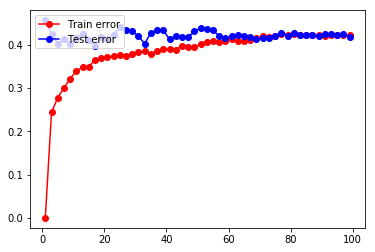

In [21]:
model = lambda x: KNeighborsClassifier(n_neighbors = x)
print_model_evaluetion(model, range(1, 100, 2))

In [50]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[ 20  31   3   0]
 [ 25 158  28  15]
 [  0  60  41  26]
 [  0  11  34 127]]


## Подбор параметров

In [148]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print('best_cv_err: ', best_cv_err, '\best_n_neighbors : ', best_n_neighbors)

best_cv_err:  0.4152479644707624 est_n_neighbors :  25


c:\users\daro1017\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [147]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print('err_train: ', err_train, '\nerr_test : ', err_test)

err_train:  0.3760177646188009 
err_test :  0.41796200345423146


# SVC

In [23]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print('err_train: ', err_train, '\nerr_test : ', err_test)

/home/daniil/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


err_train:  0.36528497409326427 
err_test :  0.35233160621761656


# Подбор параметров

In [145]:
from sklearn.model_selection import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print('best_cv_err: ', best_cv_err, '\best_C : ', best_C)

c:\users\daro1017\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best_cv_err:  0.35011102886750556 est_C :  10000.0


Best test error:  0.34196891191709844 
Best train error:  0.280440414507772 
Param:  14


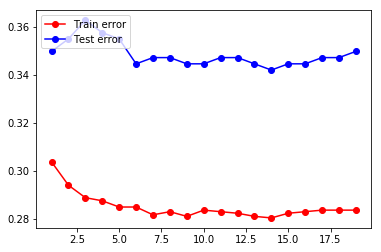

In [24]:
model = lambda x: SVC(C = x, gamma = 'scale', kernel = "linear")
print_model_evaluetion(model, range(1, 20, 1))

# Random Forest

In [25]:
rf = ensemble.RandomForestClassifier(n_estimators = 3)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('err_train: ', err_train, '\nerr_test : ', err_test)

err_train:  0.07577720207253887 
err_test :  0.38082901554404147


### Значимость признаков

In [56]:
np.sum(rf.feature_importances_)

0.9999999999999998

In [57]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature 'apartmentSquare' (0.170191)
 2. feature 'longitude' (0.117645)
 3. feature 'latitude' (0.097675)
 4. feature 'absoluteTime' (0.075475)
 5. feature 'metroDistance' (0.075101)
 6. feature 'postalCode' (0.066609)
 7. feature 'apartmentFloor' (0.061769)
 8. feature 'buildingFloor' (0.057825)
 9. feature 'commissionPercent' (0.046954)
10. feature 'metroStation_Горьковская' (0.030602)
11. feature 'apartmentType_1-к квартира' (0.026199)
12. feature 'agency' (0.019959)
13. feature 'apartmentType_3-к квартира' (0.018655)
14. feature 'apartmentType_2-к квартира' (0.015989)
15. feature 'area_Нижегородский район' (0.013920)
16. feature 'metroStation_Парк Культуры' (0.010845)
17. feature 'area_Советский район' (0.009089)
18. feature 'metroLine_Сормовская линия' (0.007273)
19. feature 'area_Автозаводский район' (0.007079)
20. feature 'metroLine_Автозаводская линия' (0.006773)
21. feature 'apartmentType_Студия' (0.005385)
22. feature 'metroStation_Буревестник' (0.005168)

### Рассмотрим первые 16 самых "значимых" признаков

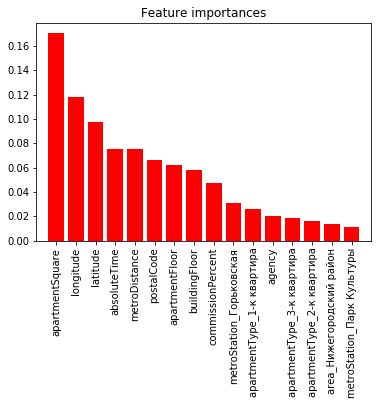

In [130]:
def print_feature_importances(start_point, d_first):
    plt.title("Feature importances")
    plt.bar(range(d_first), importances[indices[start_point:start_point+d_first]], align = 'center', color = 'r')
    plt.xticks(range(d_first), feature_names[indices[start_point:start_point+d_first]], rotation = 90)
    plt.xlim([-1, d_first])
print_feature_importances(start_point = 0, d_first = 16)

### Рассмотрим первые 16 самых менее "значимых" признаков

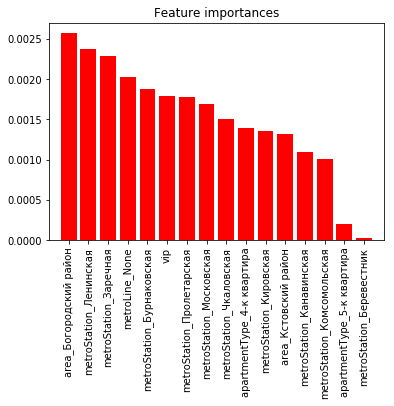

In [129]:
print_feature_importances(start_point = 30, d_first = 16)

Best test error:  0.3160621761658031 
Best train error:  0.0 
Param:  51


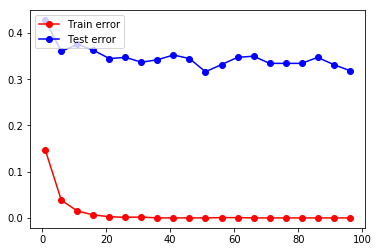

In [27]:
model = lambda x: ensemble.RandomForestClassifier(n_estimators = x)
print_model_evaluetion(model, range(1, 100, 5))

# Extremely Randomized Trees

In [28]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print('err_train: ', err_train, '\nerr_test : ', err_test)

err_train:  0.0 
err_test :  0.3549222797927461


Best test error:  0.344559585492228 
Best train error:  0.0 
Param:  51


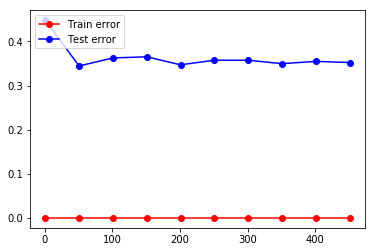

In [29]:
model = lambda x: ensemble.ExtraTreesClassifier(n_estimators = x)
print_model_evaluetion(model, range(1, 500, 50))

# AdaBoost

In [30]:
ada = ensemble.AdaBoostClassifier(n_estimators = 10)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print('err_train: ', err_train, '\nerr_test : ', err_test)

err_train:  0.36787564766839376 
err_test :  0.39896373056994816


Best test error:  0.35751295336787564 
Best train error:  0.35038860103626945 
Param:  19


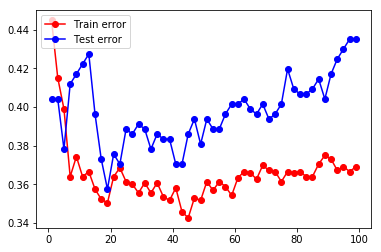

In [32]:
model = lambda x: ensemble.AdaBoostClassifier(n_estimators = x)
print_model_evaluetion(model, range(1, 100, 2))

# GBT

In [33]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 3)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print('err_train: ', err_train, '\nerr_test : ', err_test)

err_train:  0.344559585492228 
err_test :  0.3860103626943005


Best test error:  0.3290155440414508 
Best train error:  0.2610103626943005 
Param:  19


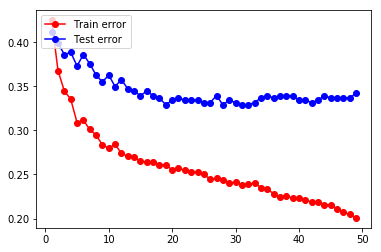

In [34]:
model = lambda x: ensemble.GradientBoostingClassifier(n_estimators = x)
print_model_evaluetion(model, range(1, 50, 1))

# Урежим признаки
так как показатели мягко говоря не самые впечатляющие(где-то 64% точности лучший результат) и почти на всех алгоритмах наблюдается сильное переобучение, попробуем уменьшить количество наших признаков
для пробы оставим лишь 5 штук и посмотрим повлияет ли это

#### Из текущих наблюдений можно увидеть, что дучше всего себя проявили SVC и Adaboost, а хуже всего Random Fprest и Extremely Randomized Trees

In [153]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

features_for_deleting = []
for f in range(5, d):
    features_for_deleting.append(feature_names[indices[f]])

In [154]:
data = data.drop(features_for_deleting, axis = 1)

In [155]:
X = data.drop(('y'), axis = 1) # выбрасываем столбец 'y'
y = data['y']
feature_names = X.columns
print(X.shape)
print(y.shape)
N, d = X.shape
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

(1930, 5)
(1930,)
1544 386


## $k$NN

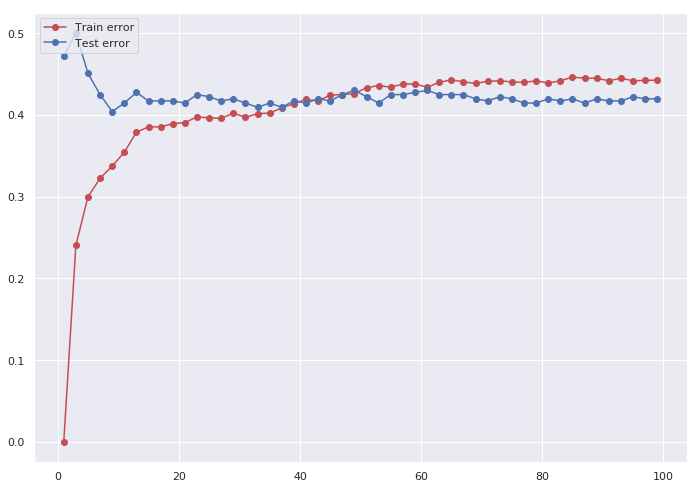

In [156]:
model = lambda x: KNeighborsClassifier(n_neighbors = x)
print_model_evaluetion(model, range(1, 100, 2))

# GBT

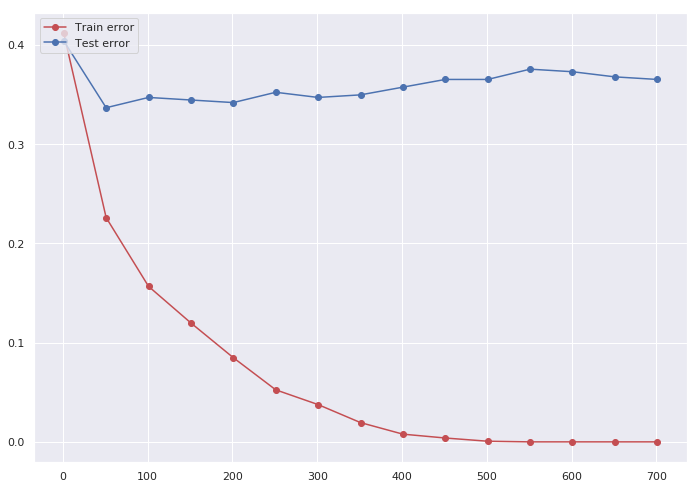

In [157]:
model = lambda x: ensemble.GradientBoostingClassifier(n_estimators = x)
print_model_evaluetion(model, range(1, 750, 50))

# AdaBoost

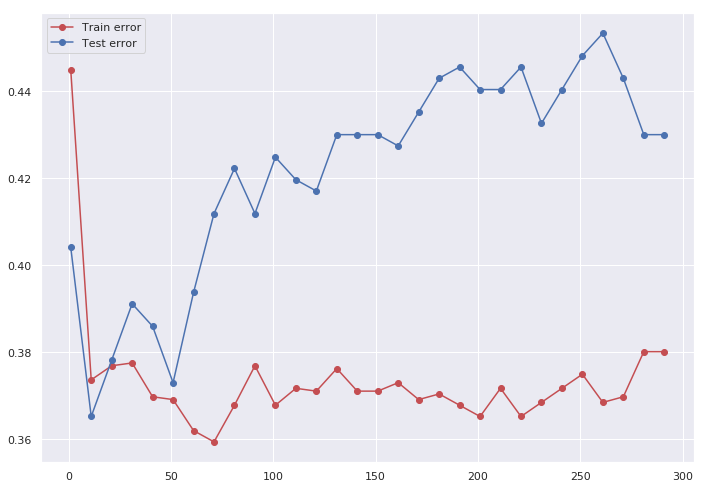

In [158]:
model = lambda x: ensemble.AdaBoostClassifier(n_estimators = x)
print_model_evaluetion(model, range(1, 300, 10))

#### К сожалению результаты почти не изменились ни в одну не в другую сторону. 
#### В следующих попытках необходимо будет повнимательнее посмотреть на данные и попробовать другие преобразования.

# Лобораторная работа 2. 
## Метод главных компонент. Понижение размерности.

In [36]:
from sklearn.decomposition import PCA

### Получим компоненты из наших исходных данных и посмтрим в какие числа они преобразовались

In [40]:
components_number = 6
pca = PCA(n_components = components_number)
X_PCA = pca.fit_transform(X)

In [41]:
X_PCA

array([[-1.15445665,  1.86622873, -1.54449459,  0.8462249 , -1.02963146,
        -0.16633792],
       [-0.49519877, -0.04108961,  1.10807929,  1.09825766, -0.82596556,
        -0.5296286 ],
       [-0.12219596,  1.06876418,  0.14774521,  0.85373272, -0.34594032,
        -0.47492445],
       ...,
       [-0.88856256, -1.59014007, -0.4011046 , -0.70574284,  1.21836289,
         0.78686431],
       [-1.38111269,  6.87360332,  2.12173766, -1.66584889,  3.30827803,
         1.00858949],
       [ 3.20482211, -0.03513857, -0.12337833, -1.32066142,  1.38662344,
        -0.07792106]])

### Попарно визуализируем компоненты как делали вначале с признаками

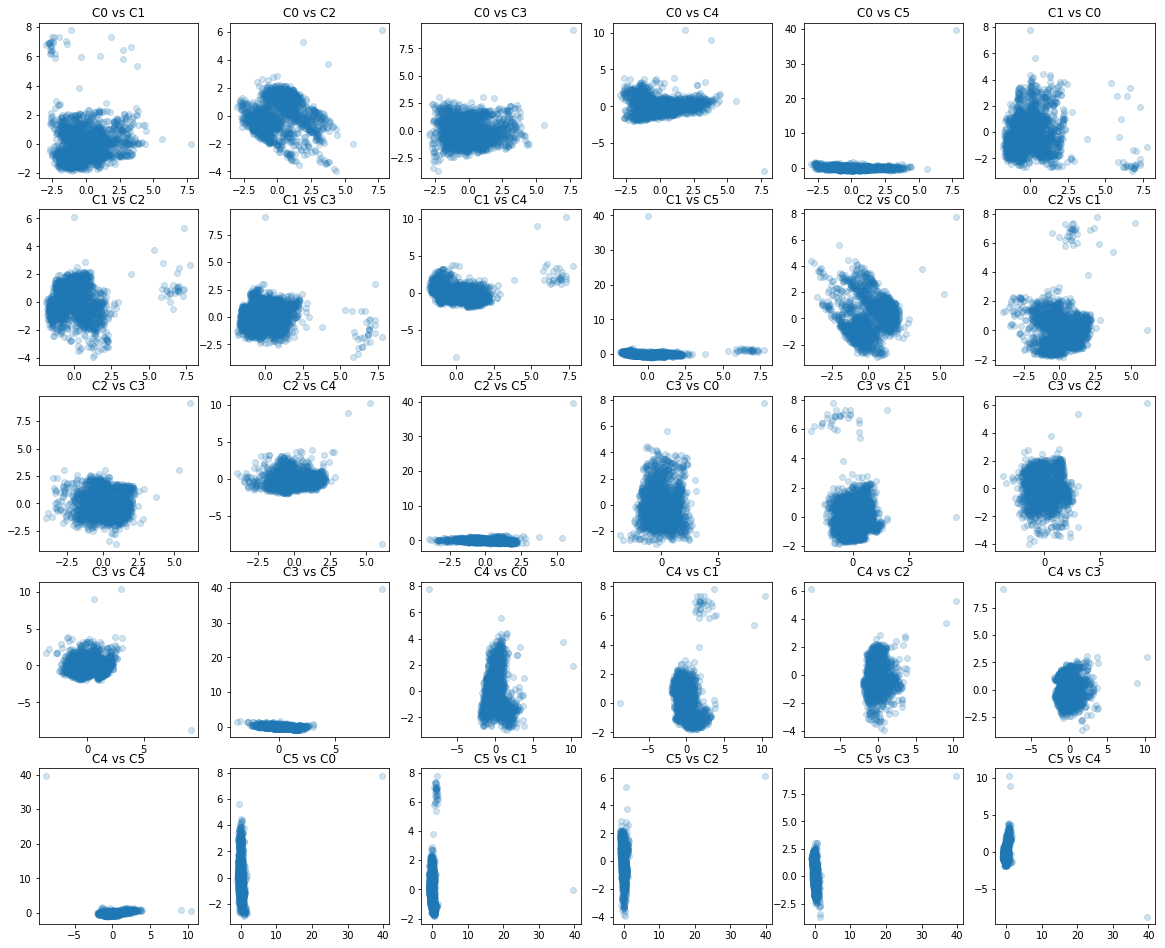

In [44]:
pca = PCA(n_components = components_number)
X_PCA = pca.fit_transform(X)


import math

from matplotlib import gridspec

N = components_number ** 2
cols = 6
rows = int(math.ceil(N / cols))

gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(20,20))
count = 0

for i in range(components_number):
    for j in range(components_number):
        if i != j:
            ax = fig.add_subplot(gs[count])
            ax.title.set_text('C'+str(i)+' vs C'+str(j))
            ax.scatter(X_PCA[:,i], X_PCA[:,j], alpha = .2)
            count = count + 1



### Изобразим график зависимости ошибки от числа компонент

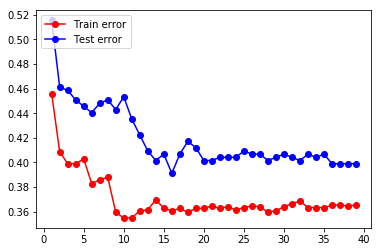

In [46]:
comp = range(1, 40, 1)
err_train_mas = []
err_test_mas = []
for temp in comp:
    pca = PCA(n_components = temp)
    X_PCA = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size = 0.2, random_state = 42)
    knn = KNeighborsClassifier(n_neighbors = 17).fit(X_train, y_train)
    err_train_mas.append(np.mean(knn.predict(X_train) != y_train))
    err_test_mas.append(np.mean(knn.predict(X_test) != y_test))
plt.plot(comp, err_train_mas, 'r-o', label = 'Train error')
plt.plot(comp, err_test_mas,  'b-o', label = 'Test error')    
plt.legend(loc = 2)

### Видно, что ошибка падает хоть и в данном случаи все равно остается достаточно большой
### Посмотрим численно начиная с какой компоненты ошибка перестает существенно меняться

In [47]:
for i in range(39):
    print("Число компонент: " , i + 1, "Значение ошибки на тестовой выборке: " , err_test_mas[i])

Число компонент:  1 Значение ошибки на тестовой выборке:  0.5155440414507773
Число компонент:  2 Значение ошибки на тестовой выборке:  0.46113989637305697
Число компонент:  3 Значение ошибки на тестовой выборке:  0.4585492227979275
Число компонент:  4 Значение ошибки на тестовой выборке:  0.45077720207253885
Число компонент:  5 Значение ошибки на тестовой выборке:  0.44559585492227977
Число компонент:  6 Значение ошибки на тестовой выборке:  0.44041450777202074
Число компонент:  7 Значение ошибки на тестовой выборке:  0.4481865284974093
Число компонент:  8 Значение ошибки на тестовой выборке:  0.45077720207253885
Число компонент:  9 Значение ошибки на тестовой выборке:  0.4430051813471503
Число компонент:  10 Значение ошибки на тестовой выборке:  0.4533678756476684
Число компонент:  11 Значение ошибки на тестовой выборке:  0.43523316062176165
Число компонент:  12 Значение ошибки на тестовой выборке:  0.422279792746114
Число компонент:  13 Значение ошибки на тестовой выборке:  0.4093264

### Видно, что уже на 13 компонентах можно остановиться

### Можно попытаться изобразить регионы решений в 2мерном пространстве или другими словами при 2 компонентах и посмотреть как из этого не выйдет ничего хорошего)

In [60]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

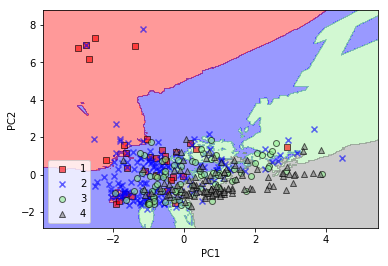

In [66]:
pca = PCA(n_components = 2)
X_PCA = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size = 0.2, random_state = 42)
model = KNeighborsClassifier(n_neighbors = 17).fit(X_train, y_train)
plot_decision_regions(X_test, y_test, classifier=model)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

### Применим полный перебор признаков на методе ближайших соседей, чтобы таким образом выделить самые значимые и в дальнейшем использовать не весь набор, а лишь отобраные признаки

In [160]:
def calculate_best_features_by_model(model):
    c = {"min_error": 1,"min_error_train": 1, "select_feature": None, 
         "features": X_test.columns.tolist(), "sorted_features": [], 
         "sorted_error": [], "sorted_error_train": []}

    def set_min_error(new_min,error_train, feature, c):
        if new_min < c['min_error']:
            c['min_error_train'] = error_train
            c['min_error'] = new_min
            c['select_feature'] = feature

    def process_best_feature(c):
        c['sorted_error_train'].append(c['min_error_train'])
        c['sorted_error'].append(c['min_error'])
        c['sorted_features'].append(c['select_feature'])
        c['features'].remove(c['select_feature'])
        c['select_feature'] = None
        c['min_error'] = 1

    def get_x(x, c):
        tmp = []
        for feature in c['sorted_features']:
            tmp.append(x[feature])
        return pd.concat(tmp, axis=1, keys=[s.name for s in tmp])

    while len(c['features']) > 0:
        for i in c['features']:
            c['sorted_features'].append(i)

            model = model.fit(get_x(X_train, c), y_train)
            error_train = np.mean(model.predict(get_x(X_train, c)) != y_train)
            error_test = np.mean(model.predict(get_x(X_test, c)) != y_test)
            set_min_error(error_test,error_train, i, c)

            c['sorted_features'].pop()

#         print('pass: ', c['select_feature'], '     : ', c['min_error'])
        process_best_feature(c)
    return c

pass:  apartmentSquare      :  0.422279792746114
pass:  latitude      :  0.344559585492228
pass:  metroStation_Горьковская      :  0.3316062176165803
pass:  apartmentType_3-к квартира      :  0.32642487046632124
pass:  metroStation_Заречная      :  0.32124352331606215
pass:  metroStation_Стрелка      :  0.3160621761658031
pass:  metroStation_Буревестник      :  0.3082901554404145
pass:  apartmentType_4-к квартира      :  0.30569948186528495
pass:  metroLine_Автозаводская линия      :  0.30310880829015546
pass:  area_Богородский район      :  0.3005181347150259
pass:  area_Кстовский район      :  0.2979274611398964
pass:  metroStation_Беревестник      :  0.2979274611398964
pass:  metroStation_Комсомольская      :  0.2979274611398964
pass:  metroStation_Кировская      :  0.2979274611398964
pass:  apartmentType_5-к квартира      :  0.2979274611398964
pass:  vip      :  0.2979274611398964
pass:  apartmentType_Студия      :  0.2979274611398964
pass:  metroStation_Автозаводская      :  0.300

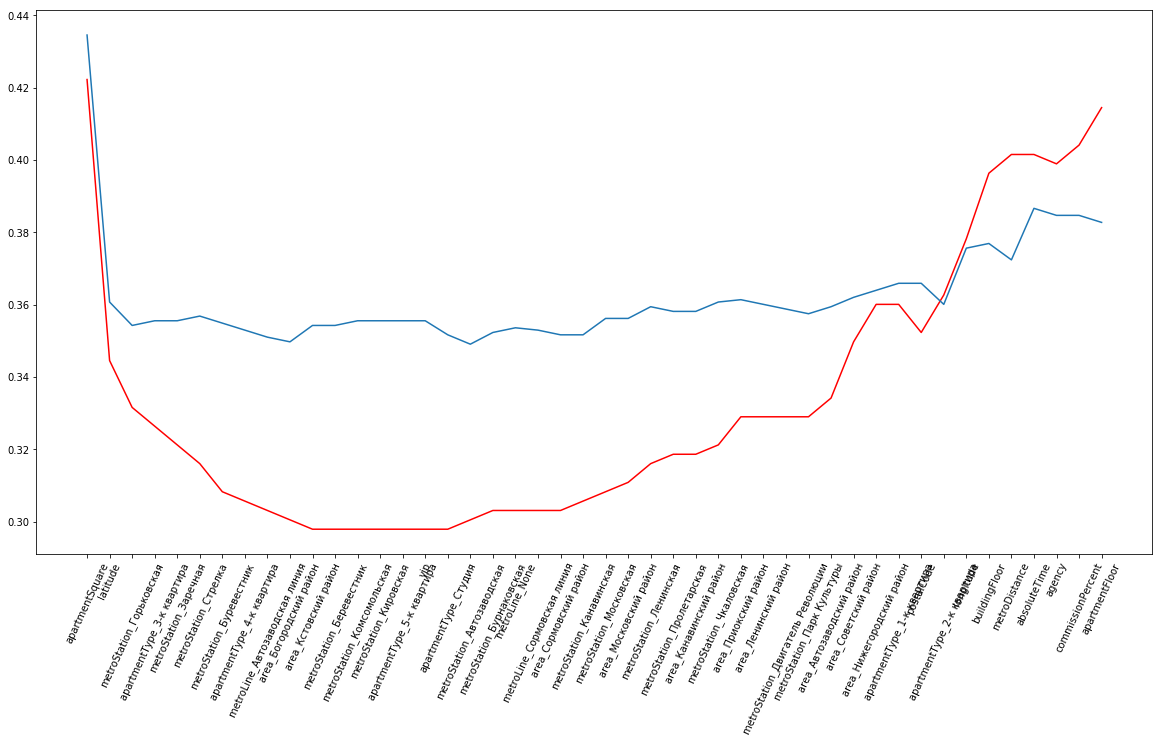

In [31]:
knn = KNeighborsClassifier(n_neighbors = 34)
c = calculate_best_features_by_model(knn)

plt.figure(figsize=(20,10))
plt.xticks(rotation=65)
plt.plot(c['sorted_features'], c['sorted_error'], color='r', label = 'test')
plt.plot(c['sorted_features'], c['sorted_error_train'], label = 'train')

#### Видно что примерно при 2/3 признаком наблюдается недообучение, дальше буквально при еще паре признаков видна близость тестовой и тренеровочных ошибок и при дальнейшем увеличении признаков происходит переобучение. 

pass:  apartmentSquare      :  0.41968911917098445
pass:  latitude      :  0.3290155440414508
pass:  metroLine_Автозаводская линия      :  0.31088082901554404
pass:  metroLine_Сормовская линия      :  0.30310880829015546
pass:  metroStation_Беревестник      :  0.30310880829015546
pass:  metroStation_Буревестник      :  0.30310880829015546
pass:  metroStation_Бурнаковская      :  0.30310880829015546
pass:  metroStation_Двигатель Революции      :  0.30310880829015546
pass:  metroStation_Заречная      :  0.30310880829015546
pass:  metroStation_Канавинская      :  0.30310880829015546
pass:  metroStation_Кировская      :  0.30310880829015546
pass:  metroStation_Комсомольская      :  0.30310880829015546
pass:  metroStation_Московская      :  0.30310880829015546
pass:  metroStation_Стрелка      :  0.30310880829015546
pass:  metroStation_Чкаловская      :  0.30310880829015546
pass:  metroLine_None      :  0.30310880829015546
pass:  apartmentType_3-к квартира      :  0.30310880829015546
pass:  

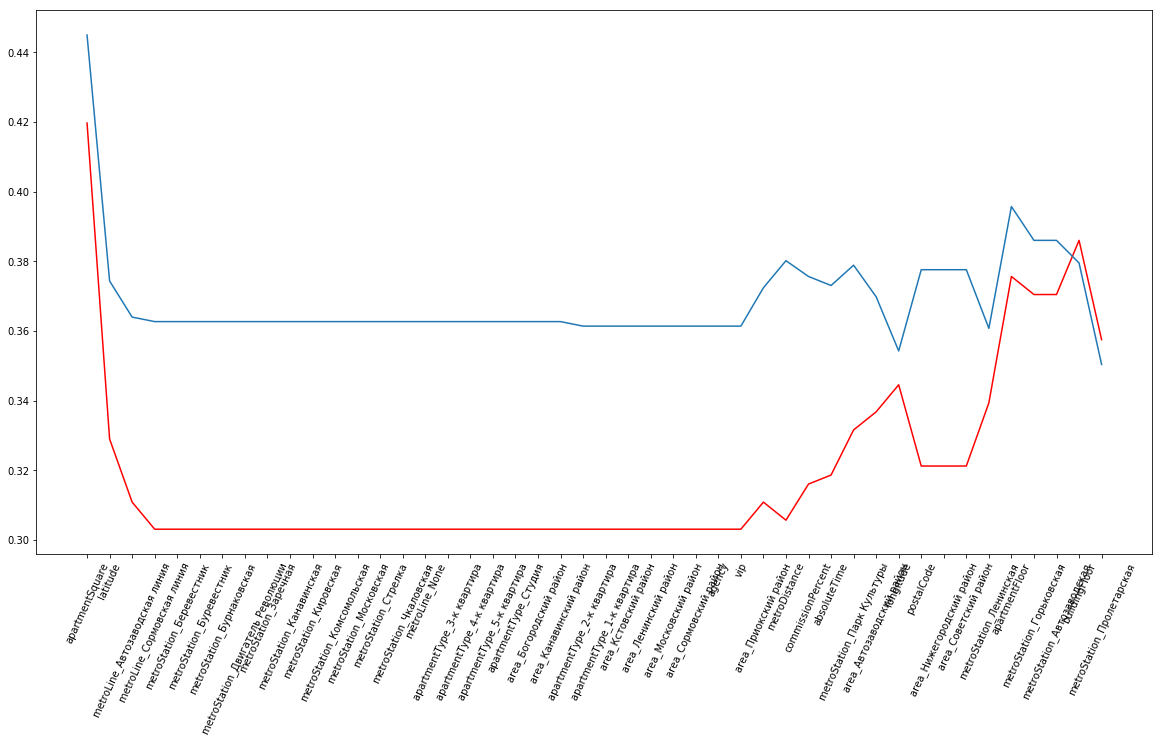

In [24]:
ada_boost = ensemble.AdaBoostClassifier(n_estimators = 19)
c = calculate_best_features_by_model(ada_boost)

plt.figure(figsize=(20,10))
plt.xticks(rotation=65)
plt.plot(c['sorted_features'], c['sorted_error'], color='r', label = 'test')
plt.plot(c['sorted_features'], c['sorted_error_train'], label = 'train')

##### Видно что почти на всем пространстве признаков наблюдается недообучение и картинка в конце отличается от той, что мы могли наблюдать при использовании метода ближайших соседей. Здесь же видно, что в конце ошибка стала как и на тестовой так и на тренеровочной выборке идти вниз. Возмодно если добавить релевантных признаков, то ошибка продолжила бы спускаться до какого-то момента. 

# Лабораторная работа 3

# Многослойный персептрон

In [32]:
from sklearn.neural_network import MLPClassifier

In [98]:
mlp_model = MLPClassifier(hidden_layer_sizes = (2,4), solver = 'lbfgs', 
                          activation = 'relu', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [99]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [100]:
print('Train error: {}, Test error: {}'.format(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

Train error: 0.2927461139896373, Test error: 0.31865284974093266


### Подбор параметра $\alpha$.

In [104]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (2, 4), 
                              solver = 'lbfgs', activation = 'relu', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

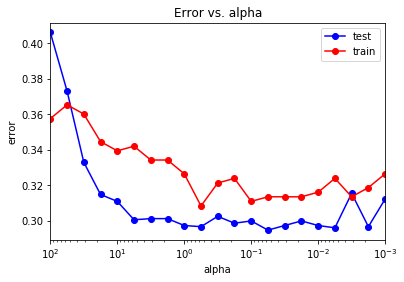

In [105]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

#### Классификатор при найденном оптимальном значении $\alpha$.

In [114]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
alpha_opt = alpha_arr[test_err == min_test_err][0]

print('Min train error: {}, \tMin test error: {}'.format(min_train_err, min_test_err))
print('Alpha: ', alpha_opt)

Min train error: 0.29468911917098445, 	Min test error: 0.3082901554404145
Alpha:  0.5623413251903491


In [118]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (2, 4),
                          solver = 'lbfgs', activation = 'relu', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print('Train error: {}, Test error: {}'.format(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

Train error: 0.2966321243523316, Test error: 0.3082901554404145


### Подбор колличесва нейронов на слоях.

In [121]:
neurons_arr = np.arange(2,20, 1)
test_err = []
train_err = []
neurons = []
for neuron_1_layer in neurons_arr:
    for neuron_2_layer in neurons_arr:
        mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_1_layer, neuron_2_layer), 
                                  solver = 'lbfgs', activation = 'relu', random_state = 42)
        mlp_model.fit(X_train, y_train)

        y_train_pred = mlp_model.predict(X_train)
        y_test_pred = mlp_model.predict(X_test)
        neurons.append('{}X{}'.format(neuron_1_layer, neuron_2_layer))
        train_err.append(np.mean(y_train != y_train_pred))
        test_err.append(np.mean(y_test != y_test_pred))

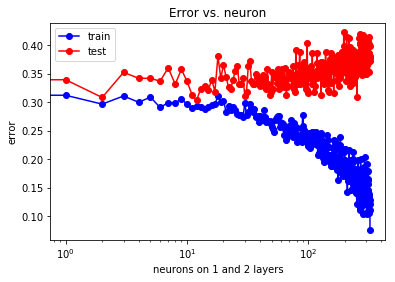

In [124]:
plt.semilogx(neurons, train_err, 'b-o', label = 'train')
plt.semilogx(neurons, test_err, 'r-o', label = 'test')
plt.title('Error vs. neuron')
plt.xlabel('neurons on 1 and 2 layers')
plt.ylabel('error')
plt.legend()
pass

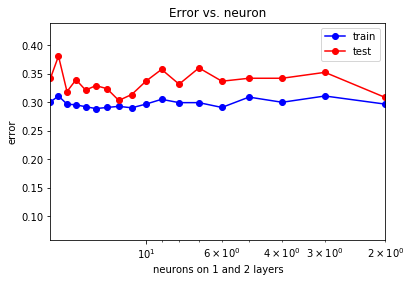

In [126]:
plt.semilogx(neurons, train_err, 'b-o', label = 'train')
plt.semilogx(neurons, test_err, 'r-o', label = 'test')
plt.xlim([np.max(neurons_arr), np.min(neurons_arr)])
plt.title('Error vs. neuron')
plt.xlabel('neurons on 1 and 2 layers')
plt.ylabel('error')
plt.legend()
pass

##### Классификатор при найденно оптимальном значении количества нейронов.

In [147]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

index = np.where(test_err == min_test_err)[0][0]

neuron_opt = neurons[index]
neuron_opt

'2X14'

In [157]:
neuron_opt_1 = 2
neuron_opt_2 = 14

In [161]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_opt_1, neuron_opt_2),
                          solver = 'lbfgs', activation = 'relu', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print('Train error: {}, Test error: {}'.format(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

Train error: 0.2927461139896373, Test error: 0.30310880829015546


### Результат получился примерно такой же как и на предыдущих методах, но по рафикам видно, что ошибка сходится к минимальной без сильного недообучения как это ярко выраженно на предыдущих алгоритмах

### Посмотрим как наши подобранные параметры реагируют на колиество признаков

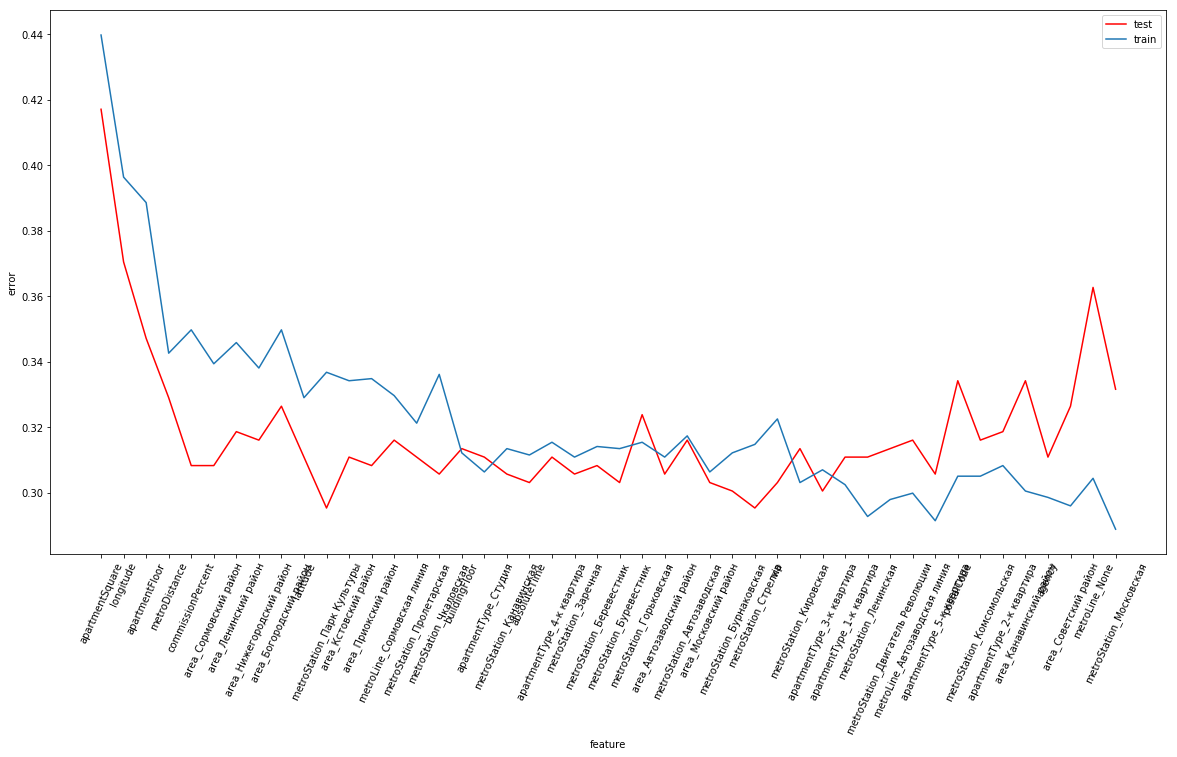

In [162]:
ada_boost = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_opt_1, neuron_opt_2),
                          solver = 'lbfgs', activation = 'relu', random_state = 42)
c = calculate_best_features_by_model(ada_boost)

plt.figure(figsize=(20,10))
plt.xticks(rotation=65)
plt.plot(c['sorted_features'], c['sorted_error'], color='r', label = 'test')
plt.plot(c['sorted_features'], c['sorted_error_train'], label = 'train')
plt.xlabel('feature')
plt.ylabel('error')
plt.legend()

### Штож, видим что существенно в ошибках ничего не поменялось разве что как и было замечено выше этот алгоритм показывает меньше недообучения при не большом количестве признаков. Так же легко заметить, что примерно после 2/3 признаков начинается переобучение. 

### C Random forests и Gradient boosted trees уже упранялись ранее, но не смотрели на oob ошибку у рандом форест поэтому повторим попытку и понаблюдаем эту ошибку

In [168]:
from sklearn.ensemble import RandomForestClassifier

estiamtors = np.arange(100,3000, 200)
test_err = []
train_err = []
oob_score = []
for estimator in estiamtors:
    rf = RandomForestClassifier(n_estimators = estimator, random_state = 42, oob_score=True)
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_score.append(rf.oob_score_)

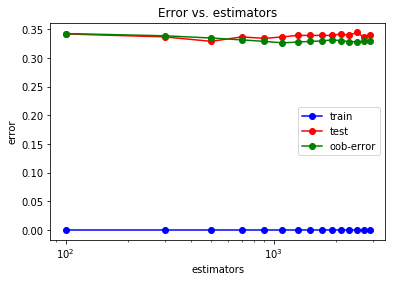

In [170]:
plt.semilogx(estiamtors, train_err, 'b-o', label = 'train')
plt.semilogx(estiamtors, test_err, 'r-o', label = 'test')
plt.semilogx(estiamtors, np.ones(len(oob_score))-oob_score, 'g-o', label = 'oob-error')
plt.title('Error vs. estimators')
plt.xlabel('estimators')
plt.ylabel('error')
plt.legend()
pass

### Видем, что у нас на лицо сильное переобуение. Так же oob ошибка похожа на ошибку на тесте и по ней можно судить какая ошибка будет на следующих итерациях не делаях их как минимум если есть явный тренд, но сложно сказать на сколько она будет полезна при сильных колебаниях.  